# Analysis and Visualization of the cleaned WeRateDogs dataset
#### by Yves Deutschmann

## Introduction

Cats or dogs - most people tend to have an affection for one of the two. If you belong to the latter group you might have heard from the WeRateDogs Twitter account. In case you don't: This is a twitter account that rates pictures of peoples dogs with a humorous text. The account has become famous for this kind of ironic comments in combination with a rating that is exceeding the rating scale regularly.
Udacity received the twitter archive from WeRateDogs for education purposes and after cleaning the dataset we are now ready to analyze the data.

This report will deliver insights and visualizations  according to three questions :

1. What is the favorite og breed among the followers?
2. What is the 'best' dog-stage?
3. Is there a relation between the rating and the favorite count?

In [15]:
import pandas as pd
import numpy as np
from plotnine import *

In [2]:
# import cleaned dataset
df_clean = pd.read_csv('twitter_archive_master.csv')

In [4]:
df_clean.tweet_id = df_clean.tweet_id.astype(str)
df_clean.timestamp = pd.to_datetime(df_clean.timestamp)
df_clean.dog_stage = df_clean.dog_stage.astype('category')
df_clean.source = df_clean.source.astype('category')

### 1. What is the favorite dog breed in this dataset?

To answer this question, we extracted the top10 results from a neural network that can classify breeds of dogs. With this list we were able to filter the data for only these breeds and find the following distribution for the favorite counts:

In [5]:
# find top10 dog breeds in tier1 image predictions
top_breeds = list(df_clean.loc[df_clean.p1_dog == True].p1.value_counts().head(10).keys())
# filter data for plot to only include top10 breeds
data_p1 = df_clean.loc[df_clean.p1.isin(top_breeds)].groupby('p1').favorite_count.mean().reset_index()

p1 = (
    ggplot(aes(x = 'p1', y = 'favorite_count'), data = data_p1) +
        geom_bar(stat= 'identity') +
        theme(axis_text_x=element_text(rotation=90, hjust=1)) +
        ggtitle('mean favorite count of top10 breed predictions') +
        xlab('dog breed') +
        ylab('mean favorite count')
     )

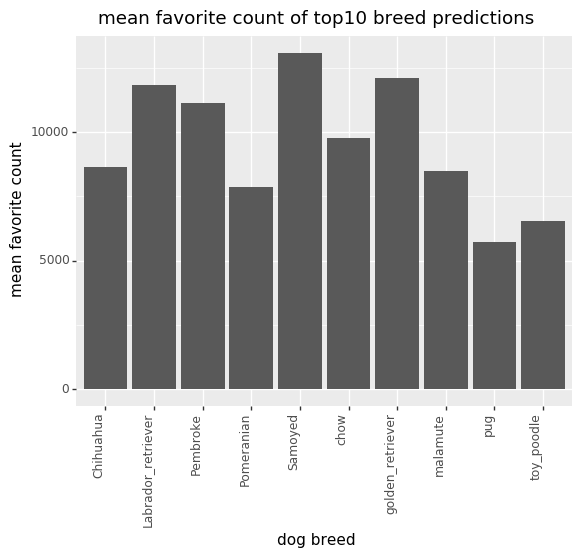

<ggplot: (177321780579)>


In [6]:
print(p1)

This bar chart is showing that 'Samoyed' is the crowds favorite with 'Golden Retriever' as a close second. After googling a Samoyed I can totally understand this voting and would declare this result as reasonable.  
> **Insight 1: Samoyeds are the best dog breed!**

### 2. What is the best dog-stage?

There are 4 stages that a dog can be classified as according to WeRateDogs Dogtionary. For more in-depth information on that field I can refer to the highly academic literature:   
*"#WeRateDogs: The Most Hilarious and Adorable Pups You've Ever Seen" by Matt Nelson*

The chart below shows a boxplot for the four stages in the life of a dog and the corresponding rating ranges for that stage. For this chart we excluded outliers in form of a rating higher than 20:

In [7]:
# remove outliers from data for plot
data_p2 = df_clean.loc[df_clean.rating_normalized < 20]

p2 = (
    ggplot(aes(x = 'dog_stage', y= 'rating_normalized'), data_p2) +
        geom_boxplot() +
        ggtitle("Average ratings per dog stage") +
        xlab('dog stage') +
        ylab('normalized rating')
)

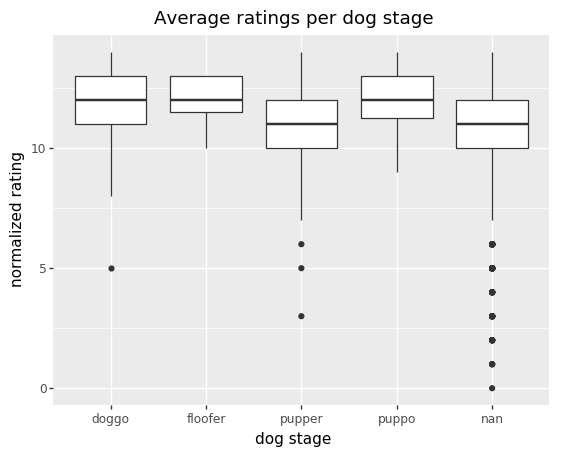

<ggplot: (-9223371859532685757)>


In [8]:
print(p2)

We can notice, that there isn't a remarkable difference between the stages doggo, floofer, and puppo. Only the stage pupper is falling off in average ratings and around the same level as all ratings without a dog-stage classification.  
> **Insight 2: Dogs in stage pupper are receive lower ratings on average.**

### 3. Is there a relation between the rating and the favorite count?

We have a normalized rating from the WeRateDogs account owner and we have a favorite count from the followers of the channel. Let's check if there is a relation between these two variables. We use the same data as for question 2, meaning ratings above 20 are excluded from this analysis.  
The scatterplot of normalized rating vs. favorite count is displayed below:

In [32]:
# surpress 'chained assognement warning'
pd.options.mode.chained_assignment = None  # default='warn'

# we use the data as in p2 and log-transform the faavorite count
corr_data = data_p2[['favorite_count', 'rating_normalized']]
corr_data['log_fav_count'] = np.log(corr_data.favorite_count)
correlation = corr_data.corr()

p3 = (
    ggplot(aes(x= 'log_fav_count', y = 'rating_normalized'), data = corr_data) +
        geom_point(alpha = 0.1) +
        geom_smooth(color= 'grey', alpha= 0.5) +
        ggtitle("normalized rating vs favorite count") +
        xlab('favorite count (log tranformed)') +
        ylab('normalized rating')
)

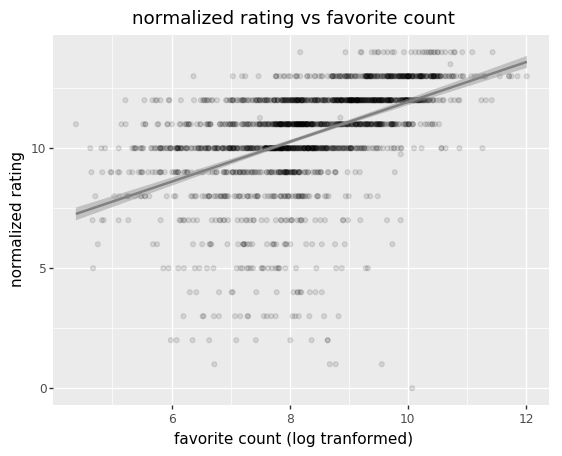

<ggplot: (-9223371859532790640)>


In [33]:
print(p3)

In [29]:
print(correlation)

                   favorite_count  rating_normalized  log_fav_count
favorite_count           1.000000           0.396254       0.737010
rating_normalized        0.396254           1.000000       0.497889
log_fav_count            0.737010           0.497889       1.000000


Because we have a pretty wide range to display on the x-axis we used a log transformation. With this transformation, we can see a moderate positive linear correlation between the two variables. A higher normalized rating means a higher favorite count and vice versa.  
But we can also notice that for the high ratings starting with 12 and above the related favorite counts fall off. The followers seem to have their own mind as to what makes a dog picture outstanding.
> **Insight 3: The followers have their own mind in terms of ratings on don't follow the WeRateDogs rating blindly!**

### Conclusion

If you're thinking about getting a dog, you should consider getting a Samoyed or a Golden Retriever in the stage of puppo or older - at least when you plan to share pictures of your buddy with WeRateDogs and care about your rating. But even when you don't score at 13/10 there is a good chance that your buddy will collect many likes from the twitter community following this channel.  
If you give a damn on those ratings and love your buddy anyways...your a good boy (or girl), too!